# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Целью проекта является изучение влияние различных критериях на стоимость объекта недвижимости.

В исследовании используются следующие показатели для анализа: 
 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
 - balcony — число балконов
 - ceiling_height — высота потолков (м)
 - cityCenters_nearest — расстояние до центра города (м)
 - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
 - first_day_exposition — дата публикации
 - floor — этаж
 - floors_total — всего этажей в доме
 - is_apartment — апартаменты (булев тип)
 - kitchen_area — площадь кухни в квадратных метрах (м²)
 - last_price — цена на момент снятия с публикации
 - living_area — жилая площадь в квадратных метрах (м²)
 - locality_name — название населённого пункта
 - open_plan — свободная планировка (булев тип)
 - parks_around3000 — число парков в радиусе 3 км
 - parks_nearest — расстояние до ближайшего парка (м)
 - ponds_around3000 — число водоёмов в радиусе 3 км
 - ponds_nearest — расстояние до ближайшего водоёма (м)
 - rooms — число комнат
 - studio — квартира-студия (булев тип)
 - total_area — общая площадь квартиры в квадратных метрах (м²)
 - total_images — число фотографий квартиры в объявлении
 
 План рботы проекта: 
 1. Изучение общей информации о данных. 
 2. Предобработка данных: заполнение пропусков в столбцах, изменение типов данных, работа с дубликатами и утсраненеи редких и выбивающихся значений. 
 3. Добавление в таблицу столбцов со следющими параметрами: ценой одного квадратного метра,дня недели публикации объявления; месяца публикации объявления; года публикации объявления; типа этажа квартиры; расстояния до центра города в километрах.
 4. Проведение исследовательского анализа данных:
 - Изучение следующие параметры объектов: общая площадь;жилая площадь;площадь кухни;цена объекта;количество комнат;высота потолков;этаж квартиры; тип этажа квартиры («первый», «последний», «другой»);общее количество этажей в доме;расстояние до центра города в метрах;расстояние до ближайшего аэропорта;расстояние до ближайшего парка;день и месяц публикации объявления.
- Изучение того, как бытсро продавались крвтаиры. 
- Изучение зависимости цены от общей площади, жилой площади,площади кухни,количества комнат, этажа, на котором расположена квартира (первый, последний, другой), даты размещения (день недели, месяц, год).
- Подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
- Изучение зависимости стоимости объектов от расстояния до центра города.
5. Общий вывод.

## Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

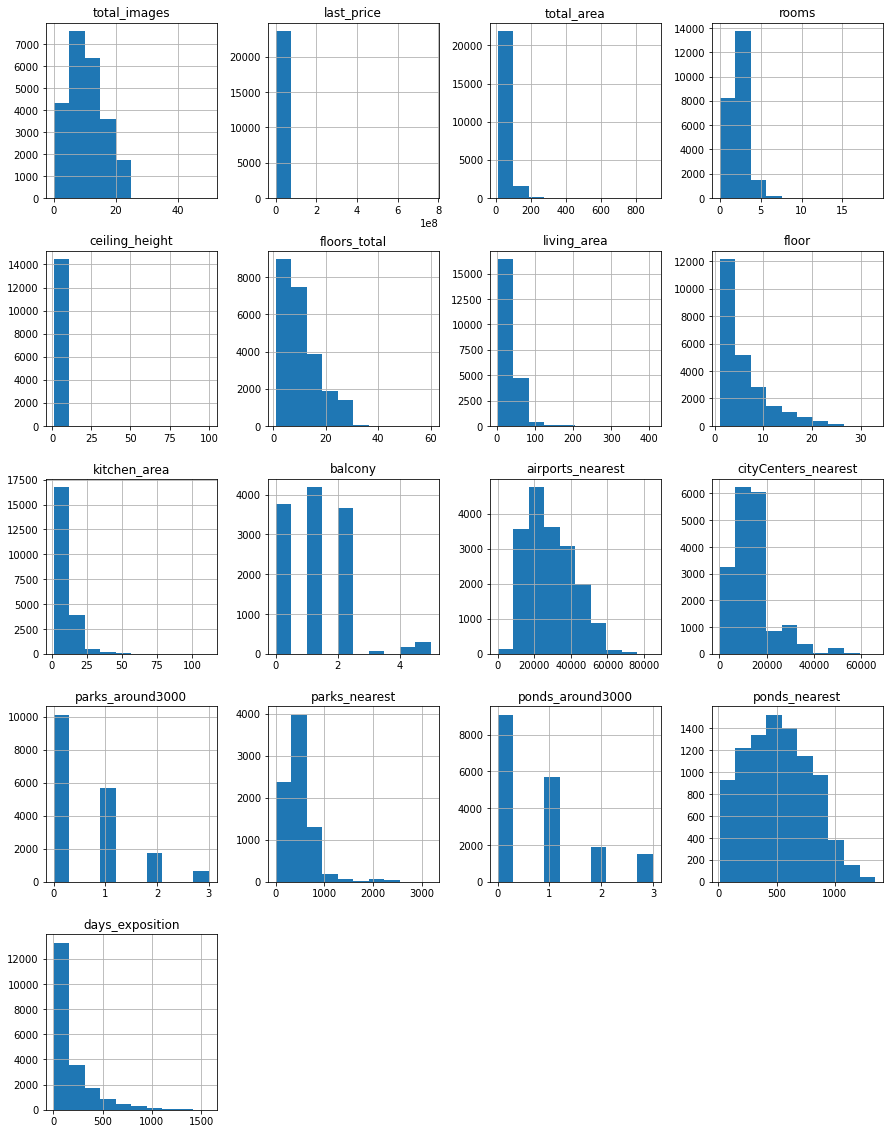

In [1]:
import pandas as pd 
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

#изучение общей информации о полученном датафрейме
print(data.info())
print(data.head())

#построение гистограммы для всех числовых столбцов таблицы
data.hist(figsize=(15, 20))

Можно сказать о том, что данные имеют разные типы. Что также харатерно, так это то, то изучение граффиков показывает, что ряд покаателей в данных имеют пропуски (так как выдялется большое количество значение, которое равно 0, что свидетельствует о том, что в последюущих шагах работы необходимо будет устранить пропсуки в данных).

## Предобработка данных

In [2]:
# изучение количества пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Итак, можно увидеть, что пропущенные значения присутствуют в следующих столбцах: 

ceiling_height           9195
floors_total               86
living_area              1903
is_apartment            20924
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181

Переходя к объяснению подходов к заполнению пропусков в данных необходимо отметить, что во избежание влияния выбросов, в данном исследовании используется медианное значение для заполнения пропусков. Также необходимо изменить 0 на 1 в столбце rooms, так как квартир без комнат не существует (даже студия, по своей сути) имеет комнату. Теперь каждый из столбцов с пропусками будет рассмотрен отдельно: 

•	Пропуски в days_exposition не будут заполнены, так как можно предположить, что они образовались из-за того, что на момент сбора данных объявление остается открытым, или же после заключения сделки продавец (владелец объявления) еще не успел внести изменения в данный показетль). Следовательно, заполнять данные пропуски попросту нечем и это будет не релевантно. 

•	Пропуски в таких столбцах как airports_nearest, cityCenters_nearest могут появиться из-за того, что в рассматриваемым системой радиусе не было обнаружено обозначенного центра города или же аэропорта. Другой причиной может быть тот факт, что указывая город – Санкт-Петербург (или иной населенный пункт), продавец недвижимость подразумевает, что при необходимости, интересующийся человек сам посмотрит расстояние до центра). Однако данная информация является важной для дальнейшего анализа. При этом, учитывая формулировку поставленной цели исследование можно поступить следующим образом: вместо попытки связать данную информацию с какой-либо из датасета, посмотреть, какой % пропусков в данных показателях имеет отношение к Санкт-Петербургу. Таким образом, если показатель будет минимальным, то заполнение данных пропусков не является необходимым, так как не отразиться на финальных шагах анализа. 

•	Пропуски в столбцах parks_around3000, parks_nearest, ponds_around3000, ponds_nearest могут появиться из-за отсутствия парков/прудов поблизости от рассматриваемого объекта недвижимости. Другой вариант существования пропусков заключается в том, что продавец недвижимости счел данные параметры не самыми важными и не разместил информацию о них. При этом в датасете существует большое количество объектов, имеющих данную информацию, можно оставить эти пропуски, так как заполнение их может быть некорректным. 

•	Пропуски в столбце locality_name составляют всего 49 пропусков. Можно предположить, что продавец выставляет свою квартиру в каком-то определенном разделе, название которого уже носит название населенного пункта. Из-за чего человек не считает необходимым вновь указывать город, в котором находится квартира. Заменить пропуски медианным значением данного столбца невозможно, так как данные являются типом object и присвоить объявлению не его населенный пункт попросту невозможно. Таким образом, в дальнейшем данные строки с пропусками в locality_name исключаются из анализа. 

•	Пропуски в столбце balcony заменяются 0. Данный шаг являются обоснованным так как из обзора первых строк всего датафрейма видно, что 0 встречается в столбце balcony, в связи с чем можно предположить, что разместитель объявления не отметил отсутствие балкона и оставил данный критерий пропущенным так как в его квартире балкона нет.

•	Пропуски в столбце kitchen_area обрабатываются следующим образом. Если объявление относится к квартирам студиям, то ставится 0, так как в квартирах-студиях комната и кухня не разделены и площадь считается исходя из общей площади помещения. В остальных случаях пропуски заполняются с группировкой по числу комнат. Можно предположить, что пропуски появились либо из-за того, что квартира являются студией и продавец не выделили отдельно площадь кухни так как это невозможно, или же площадь кухни не была указана по ошибке/невнимательности продавца. Также вероятно, что продавец мог посчитать, что достаточно указать жилую площадь и общую площадь.

•	Пропуски в столбце living_area заполняются медианным значением группировкой общей площади по числу комнат. Можно предположить, что природа их появления в том, что продавец посчитал необходимым выделить только общую площадь и число комнат. 

•	Пропуски столбца floors_total составляют 86 пропусков, что также незначительно, как и пропуски в столбце locality_name, и заполнить их также не представляется возможным. В связи с чем, в дальнейшем строки с пропусками в данном столбце они также будут удалены. Возможно, данный пункт не является обязательным для заполнения, в связи с чем не все продавцы обращают свое внимание на необходимость заполнения данного показателя. 

•	Пропуски в столбце ceiling_height заполняются с медианным значением с группировкой по этажности здания. Можно предположить, что продавец не разместил данную информацию так как счел ее не самой необходимой. При этом, можно ожидать, что этажность здания оказывает влияние на высоту потолков. Так, в центре города обычно здания не такие высоких как на окраинах, при этом этажей в них меньше. Если после данного шага из-за пропусков в этажности останутся пропуски в высоте потолков, они будут заполнены медианными значениями, так как связать показатель высоты потолков с другими данными не приставляется возможным. 

•	Пропуски в столбце is_apartment заменим на False. Можно предположить, что пропуски образовались из-за того, что само понятие апартаментов подивилось значительно позже понятия квартир и пока еще не так распространено на рынке недвижимости.

In [3]:
# работа со столбцом rooms
data.loc[(data['rooms']==0),'rooms']= 1

# работа со столбцами locality_name и floors_total
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

# работа со столбцами airports_nearest, cityCenters_nearest

print(round(len(data[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest'].isna())]) / 
      len(data.reset_index(drop=True).query('locality_name == "Санкт-Петербург"')), 5))

print(round(len(data[(data['locality_name'] == 'Санкт-Петербург') & (data['airports_nearest'].isna())]) / 
      len(data.reset_index(drop=True).query('locality_name == "Санкт-Петербург"')), 5))
#Получается, что для анализа недвижимости, находящеся непосредтвенно в Санкт-Пербурге, пропуски в данных столбцах не влияют на анализ. Таким образом, их замены не производятся.

# работа со столбцом balcony
data.loc[(data['balcony'].isna()), 'balcony'] = 0

# работа со столбцом kitchen_area
data.loc[(data['studio']==True)&(data['kitchen_area'].isna()),'kitchen_area'] = 0

for room_1 in data['rooms'].unique():
    data.loc[(data['rooms'] == room_1) & (data['kitchen_area'].isna()),'kitchen_area'] = \
    data.loc[(data['rooms'] == room_1), 'kitchen_area'].median()
    
# работа со столбцом living_area

for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()),'living_area'] = \
    data.loc[(data['rooms'] == room), 'living_area'].median()
    
# работа со столбцом is_apartment
data['is_apartment'] = data['is_apartment'].fillna(False)

# работа со столбцами locality_name и floors_total

# работа со столбцом ceiling_height
for floors in data['floors_total'].unique():
    data.loc[(data['floors_total'] == floors) & (data['ceiling_height'].isna()),'ceiling_height'] = \
    data.loc[(data['floors_total'] == floors), 'ceiling_height'].median()

data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

# проверяем: получилось ли избавиться от пропусков
data.isna().sum()

0.00383
0.00537


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [4]:
data['kitchen_area'].corr(data['living_area'])

0.42637898352167325

In [5]:
data['kitchen_area'].corr(data['total_area'])

0.5887089456729039

In [6]:
data['kitchen_area'].corr(data['last_price'])

0.45257955136326833

In [7]:
data['kitchen_area'].corr(data['rooms'])

0.2825380632195256

Таким образом, можно предположить, что заполнение пропусков в столбце площадь кухни можно было бы провести по паказателям столбца вся площадь, так как корреляция с данным параметром составляет 0,58.

Преобразование типов данных.
Типы данных необходимо изменить в следующих столбцах для дальнейшей работы с ними и проведения анализа. Необходимо перевести следующие данные в определённый тип:
- Столбец last_price в целочисленный тип, чтобы цена отображалась целой, без копеек.
- Столбцы total_area, ceiling_height ,living_area, kitchen_area необходимо округлим до десятых, так как при рассмотрение метров квадратных дестые играют роль как для восприятия площади, так и для анализа.
- Столбец first_day_exposition необходимо перевести в формат datetime, так как в нем хранятся даты.
- Столбцы floors_total, balcony необходимо привести к целочисленным, так как нецелочисленных этажей и балконов попросту не существует. 
- Столбцы airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest необходимо также перевести в целочисленный формат, так как там фигурируют метры. 
- Столбец days_exposition необходимо также привести в целочисленный формат, так как необходимо рассматривать целое количество дней, в период которых продавалась недвижимость. 
- Столбец is_apartment необходимо перевести в булев тип как это указано в описание анализа.

In [8]:
# Список столбцов, которые необходимо перевести в int

list_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for column in list_to_int:
    data[column] = data[data[column].notnull()][column].astype('int')

# Список столбцов, которые необходимо округлить до десятых
list_to_1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']

for column in list_to_1:
    data[column] = data[data[column].notnull()][column].round(1)

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

# Проверяем изменения 
print(data.info())
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Изучение уникальных значения в столбце с названиями и устранение неявных дубликатов. Изучив список уникальных значений столбца locality_name становится видно, что часто один и тот же населенный пункт имеет перед своим названием разные обозначения. В связи с чем, для сохранения логики исследования можно изменить данные таким образом, чтобы у объявлений остались исключительно имена собственные в столбце locality_name.

In [9]:
def upper_name(name):
    for i in range(len(name)):
        if name[i].isupper() == True:
            return name[i:len(name)]

data['locality_name'] = data['locality_name'].apply(upper_name)

In [10]:
# проверяем, точно ли произошли необходимые изменения в столбце locality_name
print(data.head(20))

    total_images  last_price  total_area first_day_exposition  rooms  \
0             20    13000000       108.0           2019-03-07      3   
1              7     3350000        40.4           2018-12-04      1   
2             10     5196000        56.0           2015-08-20      2   
3              0    64900000       159.0           2015-07-24      3   
4              2    10000000       100.0           2018-06-19      2   
5             10     2890000        30.4           2018-09-10      1   
6              6     3700000        37.3           2017-11-02      1   
7              5     7915000        71.6           2019-04-18      2   
8             20     2900000        33.2           2018-05-23      1   
9             18     5400000        61.0           2017-02-26      3   
10             5     5050000        39.6           2017-11-16      1   
11             9     3300000        44.0           2018-08-27      2   
12            10     3890000        54.0           2016-06-30   

Переходя к изучению и устранению редких и выбивающихся значения в данных, строятся диорамы размаха или гистограммы, позволяющие определить, существуют ли аномалии или выбросы в данных, которые необходимо удалить. При этом используются основные хараетристики объекта недвижимости, которые необходимы для дальнейшего анализа.  

count    23565.000000
mean        60.322813
std         35.657072
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd99c2cce50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd99c2dd550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd99c2ccaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd99c2ddc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd99c2ddf70>],
 'means': []}

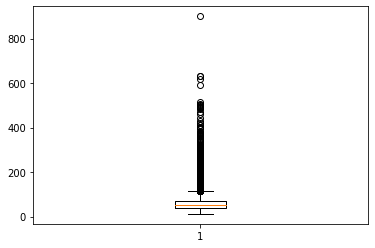

In [11]:
import matplotlib.pyplot as plt 

print(data['total_area'].describe())
plt.boxplot(data['total_area'])

In [12]:
data.shape[0]/23699

0.994345752985358

Таким образом, можно увидеть, что есть однозначные аномалии: максимальное значение в 900м2, а также несколько выбросов в районе 600м2. Действительно, такие размеры квартир встречаются не часто. Что же до расспредления остальных показателей, находящихся за пределами усов, можно увидеть, что до 400м2 расположено большое количество объектов недвижимости, таким образом, отсечение данных показателей может исказить весь дальнейший процесс исследования. Таким образом, все показатели объекты недвижимости с плошадью до 400м2 включительно будут сохранены. Можно предположить, что при большом числе комнат такая площадь, дейтсвительно, может существовать.

In [13]:
data = data.loc[(data['total_area'] <= 400)]

count    23542.000000
mean         2.074760
std          1.055497
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd99c2b7160>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd99c2b7820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd99c2a8dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd99c2b7ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd99c241280>],
 'means': []}

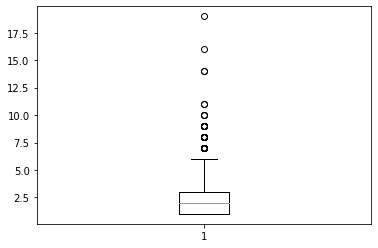

In [14]:
print(data['rooms'].describe())
plt.boxplot(data['rooms'])

In [15]:
data.shape[0]/23699

0.9933752479007553

Можно видеть, что максимальное число комнат - 19, что почти не встречается в реальности, таким образом данный показатель можно отности к аномалии. Построение боксплота также показывает, что за пределами усов находятся квартиры, в которых встречается такое число комант до 11. Принимая во внимание тот факт, что рассмотрение общей площади поазало, что существует большое число квартир с площадью до 400м2 включительно, предалагется исклчить из выборки только те показатели, которые расположене на боксплоте с большим промежутком от нескольких выбросов после усов, то есть отрезать те квартиры, в которых больше 11 комнат. 

In [16]:
data = data.loc[(data['rooms'] <= 11)]

count    23538.000000
mean        10.678732
std          6.595560
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd99c206fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd99c215700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd99c206c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd99c215dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd99c220160>],
 'means': []}

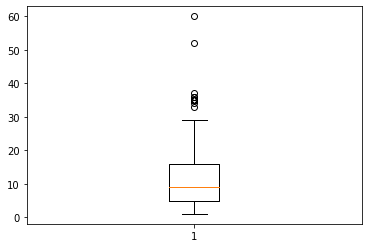

In [17]:
print(data['floors_total'].describe())
plt.boxplot(data['floors_total'])

In [18]:
data = data.loc[(data['floors_total'] <= 30)]

In [19]:
data.shape[0]/23699

0.9918561964639858

count    23506.000000
mean        34.112346
std         20.464586
min          2.000000
25%         18.400000
50%         30.300000
75%         42.600000
max        260.000000
Name: living_area, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd99c1e6a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd99c1f3130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd99c1e66d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd99c1f37f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd99c1f3b50>],
 'means': []}

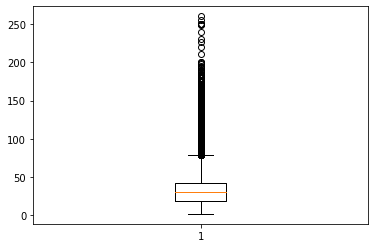

In [20]:
print(data['living_area'].describe())
plt.boxplot(data['living_area'])

In [21]:
data = data.loc[(data['living_area'] <= 75)]

In [22]:
data.shape[0]/23699

0.9553567661082746

count    22641.000000
mean         9.999033
std          4.956705
min          0.000000
25%          7.100000
50%          9.000000
75%         11.000000
max        107.000000
Name: kitchen_area, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd99c1409d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd99c14b0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd99c140670>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd99c14b790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd99c14baf0>],
 'means': []}

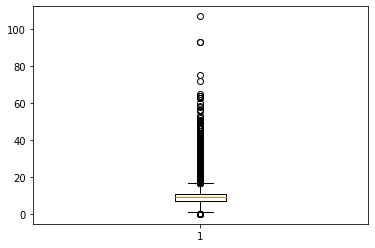

In [23]:
print(data['kitchen_area'].describe())
plt.boxplot(data['kitchen_area'])

In [24]:
data = data.loc[(data['kitchen_area'] <= 20)]

In [25]:
data.shape[0]/23699

0.9250179332461286

count    21922.000000
mean         2.727735
std          1.008456
min          1.000000
25%          2.600000
50%          2.600000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd99c11a970>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd99c127070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd99c11a610>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd99c127730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd99c127a90>],
 'means': []}

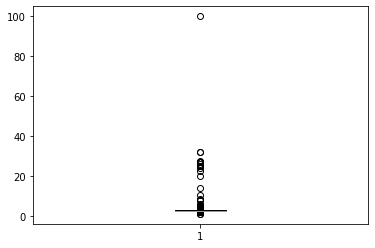

In [26]:
print(data['ceiling_height'].describe())
plt.boxplot(data['ceiling_height'])

In [27]:
data = data.loc[(data['ceiling_height'] <= 7)]

In [28]:
data.shape[0]/23699

0.9238364487953078

Если оставить предельный показатель в 3м, получается, что срез данных больше чем на 10%, что не допустимо. Рассмотрение боксплота показывает, что существует ольшое количество выбросов (плотность за усами), которые находятся на уровне 7 метров. Можно предположить, что данная высота потолков может встречаться в мансардах, квартирах на последнем этаже или же одноэтажных посройках (чатсный дом в лен области). 

count    2.189400e+04
mean     5.304920e+06
std      3.843393e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.499000e+06
75%      6.200000e+06
max      1.240000e+08
Name: last_price, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd99acadd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd99acb4880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd99acadd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd99acbbdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd99ac4b490>],
 'means': []}

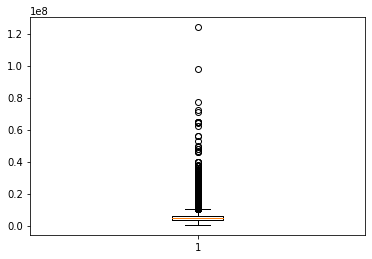

In [29]:
print(data['last_price'].describe())
plt.boxplot(data['last_price'])

Таким образом, становится видно, что максимальная цена 124 млн, что является аномалией, как и выбросы после 40 млн, так как до данной цены распределенне объектов плотное, что свидетельствует о том, что это не аномалии, а необходимые показатели для анализа. Учитывая тот факт, что датафрейм имеет в себе объекты, расположенные в Санкт-Петербурге, площадью до 400м2, как бло определено ранее, цена до 40млн включительно также не должны вызывать удивления: в городе есть престижные районы, в которых продается элитное жилье (Крестовский остров). 

In [30]:
data = data.loc[(data['last_price'] <= 40000000)]

In [31]:
data.shape[0]/23699

0.9229503354571923

In [32]:
print(data['days_exposition'].describe())

count    19105.000000
mean       174.195394
std        212.876176
min          1.000000
25%         44.000000
50%         92.000000
75%        221.000000
max       1580.000000
Name: days_exposition, dtype: float64


<AxesSubplot:>

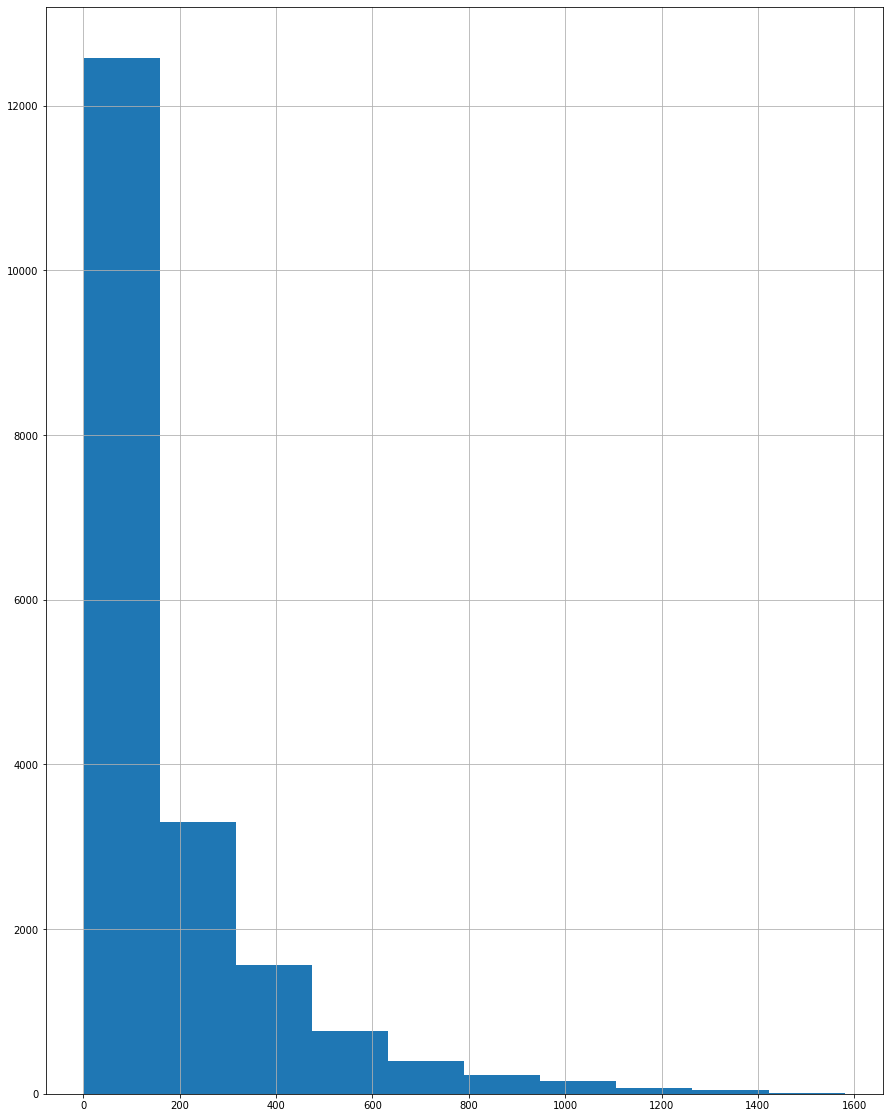

In [33]:
data['days_exposition'].hist(figsize=(15, 20))

In [34]:
data.shape[0]/23699

0.9229503354571923

При подходе к сохранению только тех показателей, у которых длительность продаж составлет до 1400 дней включительно, получается, что срезается 20% данных, чего быть не должно. Таким образом, необходимо пересмотреть подход к избавлению от аномалий. Построение гистораммы  и рассмотрение описания данных показывает, что количество объявлений с продолжительностью размещения составляет 1580 дней. При этом, принимая во внимание тот факт, что при срезании до 1400 дней процент среза по данным в два раха превышает допустимую норму, можно рассжудать следюущим образом: объекты с размешением в 1580 дней имею значение для дальнейшего анализа, таким образом, это не единичные случаи, таким образом данные по показателю количество дней размещенияне срезаются вообще, а полностью сохраняются.
    
При data = data.loc[(data['days_exposition'] <= 1400)], data.shape[0]/23699 - 0,80.

**Таким образом, становится очевидно следующее для каждого столбца**: 
 - rooms - выбросы начинаются с 6 комнат (не часто встреаются в обычной жизни 12 и далее комнатные квартиры).
 - floors_total - выбросы начинаются с 30 этажей (дейтсвительно, 60 этажное здание кажется крайне странным, с учтом того, что датасет содержит данне квартир на территории России, а не Китая).
 - living_area - выбросы начинаются с 75 м2.
 - kitchen_area - выбросы начинаются с 20 м2.
 - ceiling_height (метод describe() и гистограмма позволяют сделать вывод) - выбросы начинаются с 3м.
 - last_price (метод describe()) - становится очевидно, что выше 25 млн рублей объявлений не так много, в связи с чем, исходя из полученных описаний, 25 млн выступаюют местом начала выбросов.

Поэтому происходит избавление от данных харатеристик.

In [35]:
data.shape[0]/23699

0.9229503354571923

## Добавление в таблицу новых столбцов

**Необходимо добавить в исходный датафрейм следующие столбцы**: 
- цену одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [36]:
# добавляем столбец с ценой одного квадратного метра.
data['price_per_square_meter'] = data['last_price'] / data['total_area']

# как и в случае с last_price, переводим к целочисленному формату.
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

# добавляем столбец с днем публикации.
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

# добавляем столбец с месяцем публикации.
data['month_exposition'] = data['first_day_exposition'].dt.month

# добавляем столбец с годом публикации.
data['year_exposition'] = data['first_day_exposition'].dt.year

# добавляем столбец с типом этажа квартиры.
def floor_category(number):
    floors_total = number['floors_total']
    floor = number['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

data['floor_category'] = data.apply(floor_category, axis = 1)

# добавляем столбец с расстоянием до центра города в километрах.

data['cityCenters_km'] = (data['cityCenters_nearest'] / 1000).round()

In [37]:
# проверяем, произошли ли добавление столбцов. 

display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,cityCenters_km
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,14.0
5,10,2890000,30.4,2018-09-10,1,2.6,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065,0,9,2018,другой,NaN
6,6,3700000,37.3,2017-11-02,1,2.7,26,10.6,6,False,...,NaN,0.0,NaN,155.0,99195,3,11,2017,другой,19.0
7,5,7915000,71.6,2019-04-18,2,2.8,24,30.5,22,False,...,NaN,0.0,NaN,NaN,110544,3,4,2019,другой,12.0
8,20,2900000,33.2,2018-05-23,1,2.7,27,15.4,26,False,...,NaN,NaN,NaN,189.0,87349,2,5,2018,другой,NaN
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,False,...,NaN,0.0,NaN,289.0,88524,6,2,2017,другой,15.0
10,5,5050000,39.6,2017-11-16,1,2.7,12,20.3,3,False,...,310.0,2.0,553.0,137.0,127525,3,11,2017,другой,14.0
11,9,3300000,44.0,2018-08-27,2,2.6,5,31.0,4,False,...,NaN,0.0,NaN,7.0,75000,0,8,2018,другой,52.0
12,10,3890000,54.0,2016-06-30,2,2.6,5,30.0,5,False,...,NaN,NaN,NaN,90.0,72037,3,6,2016,последний,NaN


## Проведите исследовательский анализ данных

**Изучение следующих параметров объектов**:
 - общая площадь
 - жилая площадь
 - площадь кухни
 - цена объекта
 - количество комнат
 - высота потолков
 - этаж квартиры
 - тип этажа квартиры («первый», «последний», «другой»)
 - общее количество этажей в доме
 - расстояние до центра города в метрах
 - расстояние до ближайшего аэропорта
 - расстояние до ближайшего парка
 - день и месяц публикации объявления

In [38]:
data[['total_area','living_area','kitchen_area','last_price', 'rooms', 'ceiling_height','floor','floors_total','cityCenters_nearest','airports_nearest','parks_nearest','weekday_exposition','month_exposition']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,weekday_exposition,month_exposition
count,21873.000000,21873.000000,21873.000000,2.187300e+04,21873.000000,21873.000000,21873.000000,21873.000000,16497.000000,16478.000000,7062.000000,21873.000000,21873.000000
mean,54.288250,31.007521,9.362945,5.249380e+06,1.956202,2.698802,5.890504,10.764778,14703.076681,28903.888700,494.129567,2.569561,6.402094
std,20.333995,13.384077,3.097225,3.352738e+06,0.888644,0.202935,4.869365,6.558863,8522.046091,12889.599702,339.152076,1.791817,3.488830
min,12.000000,2.000000,0.000000,4.300000e+05,1.000000,1.000000,1.000000,1.000000,208.000000,0.000000,1.000000,0.000000,1.000000
25%,39.000000,18.000000,7.000000,3.350000e+06,1.000000,2.600000,2.000000,5.000000,10251.000000,18140.750000,290.000000,1.000000,3.000000
50%,50.000000,30.000000,9.000000,4.490000e+06,2.000000,2.600000,4.000000,9.000000,13382.000000,27088.000000,458.000000,3.000000,6.000000
75%,65.000000,40.200000,11.000000,6.200000e+06,3.000000,2.800000,8.000000,16.000000,16527.000000,37490.250000,617.000000,4.000000,10.000000
max,295.000000,75.000000,20.000000,4.000000e+07,7.000000,5.800000,27.000000,29.000000,65968.000000,84869.000000,3190.000000,6.000000,12.000000


In [39]:
print(data['floor_category'].value_counts())

другой       16071
последний     3014
первый        2788
Name: floor_category, dtype: int64


array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'last_price'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'floors_total'}>],
       [<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'weekday_exposition'}>],
       [<AxesSubplot:title={'center':'month_exposition'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

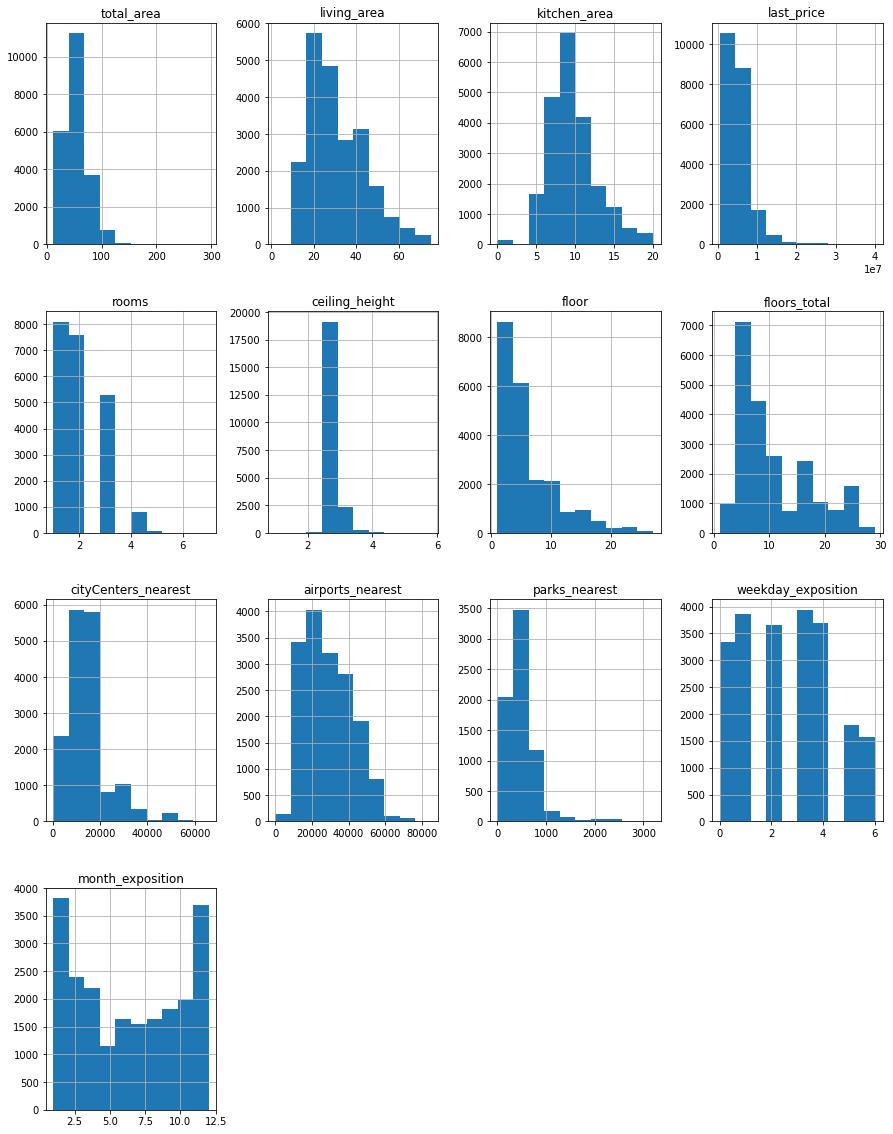

In [40]:
data[['total_area','living_area','kitchen_area','last_price', 'rooms', 'ceiling_height','floor','floors_total','cityCenters_nearest','airports_nearest','parks_nearest','weekday_exposition','month_exposition']].hist(figsize=(15, 20))

<AxesSubplot:>

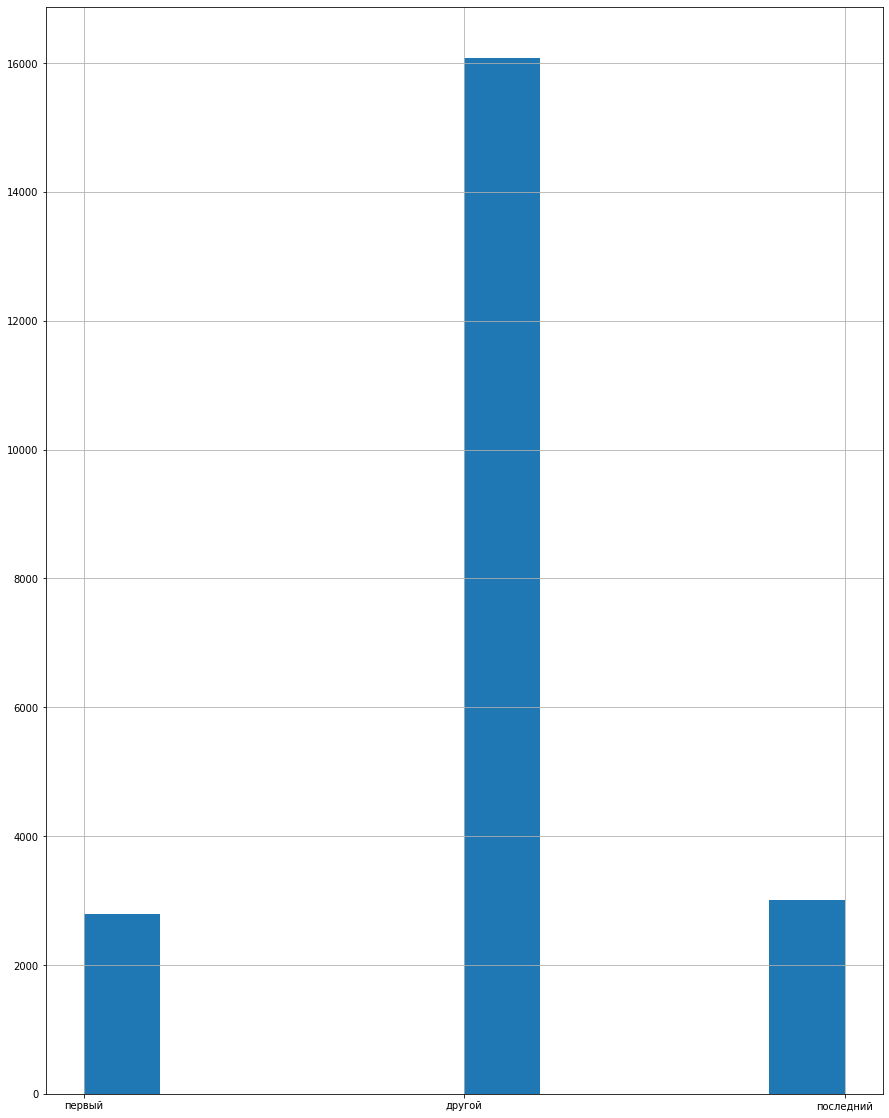

In [41]:
data['floor_category'].hist(figsize=(15, 20))

Описание параметров: 

 - общая площадь – площадь представленных объявления недвижимости варьируются от 12м2 до 150м2. Можно предположить, что объект с минимальной площадью — это нежилое помещение, использование которого предлагается под иные нужды. При этом средняя площадь квартир составляет 53м2, что коррелируется с тем, что, в среднем, размещенные объекты недвижимости имеют по 2 комнаты. 


 - жилая площадь – жилая площадь представленных объявления недвижимости варьируются от 2м2 до 75м2. Минимальная площадь, как и в случае с объектом недвижимости, который имеет площадь 12м2, скорее всего, не подразумевает использования объекта для проживания, а может относится к кладовке или иному типу недвижимости. При этом, средний показатель жилой площади составляет 30м2, что также коррелирует с тем, что, в среднем, размещенные объекты недвижимости имеют по 2 комнаты. Можно предположить, что одна комната маленькая, а другая чуть больше.  


 - площадь кухни – минимальная площадь кухни составляет 0м2. Помня о том, что в данных содержится информация о наличии студий, этот показатель не должен вызывать вопросы: студии не делятся на жилую площадь и площадь кухни так как имеют не имею разделений между двумя данными понятиями. Максимальная площадь кухни составляет 20м2, а средняя 9м2.
 

 - цена объекта – говоря о стоимости объектов недвижимости, можно заметить, что, в среднем, стоимость квартир составляет около 5млн рублей, при этом она также может достигать и 25 млн рублей


 - количество комнат – как уже было отмечено ранее, среднее значение комнат среди всех рассматриваемых объектов составляет 2. При этом минимальное количество 1, так как даже квартира студия имеет комнату. А максимальное значение 6, что коррелирует с максимальной общей площадью в 150м2.


 - высота потолков – средняя высота потолков составляет 2,6 м. Минимальное значении 1м может иметь отношение к наименьшему по площади объекту недвижимости, данная информация позволяет предположить, что это может быть маленькое подсобное помещение или кладовка. Максимальная высота потолков составляет 3 метра. 


 - этаж квартиры – средний показатель этажа, на котором располагается объект из объявления составляет 6 этаж. При этом самый высокий этаж 27. Можно предположить, что данная квартира находится в такой геолокации как Мурино или Кудрово (они встречаются при изучении и работе со столбцом locality_name). Так как в данных локациях застройка, по большей части, новая, не такая, как, допустим, в центре Санкт-Петербурга, то и этажность в ней намного больше. Минимальный этаж – 1, что также соответствует реальности: на первых эта почти во всех жилых домах есть квартиры.


 - тип этажа квартиры («первый», «последний», «другой») – количество квартир на первых и последних этажах, почти одинаково: 2653 и 2824 соответственно. Остальные этажи преобладают вреди всех объявлений


 - общее количество этажей в доме – средний показатель этажности в доме составляет 11 этажей. При этом минимальным показателем является одноэтажная постройка (это может быть дом в пригороде), а максимальный показатель в 29 этажей может встречать в уже рассмотренных ранее Мурино и Кудрово. 


 - расстояние до центра города в метрах – в среднем квартиры находятся в 15 км от центра города, что означает, что большинство из них находятся непосредственно в Санкт-Петербурге, а не Лен области. Максимальная удаленность от центра города составляет 65 км, что подходит для удаленных объектов, находящихся в Лен области. Минимальное значение составляет 400 метров. Если центр города принимается как Дворцовая площадь, то вокруг нее есть улицы, на которых находятся жилые квартиры.


 - расстояние до ближайшего аэропорта – в среднем расстояние до аэропорта составляет 29км. Минимальное значение составляет 0 (значит недвижимость находится в максимальной близости к аэропорту), а максимальная удаленность составляет 85км. Учитывая, что в Санкт-Петербурге один аэропорт Пулково, и что для всех объектов он является единственным аэропортом, данные показатели можно считать релевантным. Плюс не известно, как система рассчитывает расстояние до аэропорта: используется ли платная дорога ЗСД или нет, как способ добраться до аэропорта.


 - расстояние до ближайшего парка – среднее значение расстояние до парка составляет 500м, что означает, что много объявлений находятся в таких районах города, где есть сады/скверы/парки. При этом минимальное значение почти рано 0 (составляет 1), что может говорить о том, что квартира может находится в таких пригородах Санкт-Петербурга, где почти вся территория занята парком (Пушкин, Парголово). А максимальное значение составляет 3км, что означает, что объект недвижимости находится очень далеко от парка. 


 - день и месяц публикации объявления – абсолютно логично, что минимальным и максимальным значением выступает понедельник и воскресенье, а также январь и декабрь. Что более интересно, так это то, что чаще всего объявления публикую в начале и в конце недели (понедельник-вторник и пятница), и в начале года (январь-февраль), и в конце года (ноябрь-декабрь). Можно предположить, что день публикации выбирается таким образом, что чаще всего потенциальные покупатели изучают объявление в те дни, когда они не заняты работой, то есть в выходные (поэтому публикуют в пятницу), или же в течение всей недели, поэтому стараются разместить объявления непосредственно в ее начале. Что же до месяцев, то их можно связать с тем, что продажа квартиры может быть связана переездом из-за работы/учебы, которая может начинается с нового календарного года, поэтому и квартиры хотят продать перед переездом. Если же мы говорим о начале года, то можно предположить, что многие принимают решение о том, что хотят продать свою квартиру во время новогодних каникул, в связи с чем и появляются объявления именно в этот период. 

### Изучение, как быстро продавались квартиры.

In [42]:
data['days_exposition'].describe().to_frame()

,days_exposition
count,19105.000000
mean,174.195394
std,212.876176
min,1.000000
25%,44.000000
50%,92.000000
75%,221.000000
max,1580.000000


In [43]:
data['days_exposition'].median()

92.0

<AxesSubplot:>

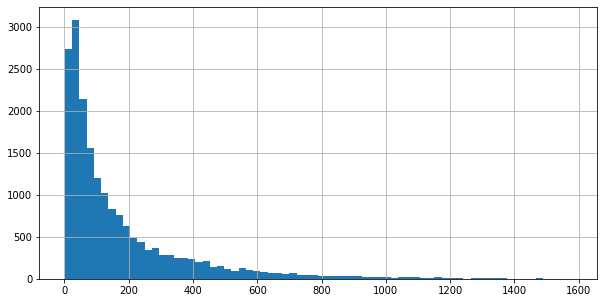

In [44]:
data['days_exposition'].hist(bins=70, figsize=(10,5))

Итак, можно увидеть, что есть квартиры, которые продавались около 4х лет. Это самая долгая продажа квартиры. Среднее время продажи недвижимости составляет около полугода, что вполне похоже на правду. Все же, рынок недвижимости большой, и принятие решение о покупке квартиры редко люди совершают импульсивно и быстро. Медианное значение составляет 90 дней – 3 месяца с даты публикации до продажи — это отличный показатель. Гистограмма показывает, что большая часть квартир продавалась в течение первых 50 дней.Учитывая, что в выборке большое количество квартир в Санкт-Петербурге, данные цифры можно объяснить тем, что в крупных городах жители или только переехавшие люди больше покупают недвижимости.

### Изучение факторов, которые больше всего влияют на общую стоимость объекта: общая площадь, жилая площадь,площадь кухни, количество комнат, типа этажа, на котором расположена квартира (первый, последний, другой), даты размещения (день недели, месяц, год).

0.7173915607045791

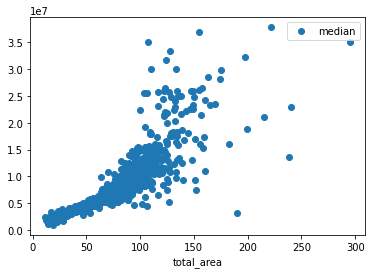

In [45]:
#Изучение зависимость цены от общей площади квартиры.

pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

Зависимость цены от общей площади квартиры большая, коэффициент Пирсона составляет 0.7, то есть, с увеличением площади увеличивается и цена. При этом, как видно из графика, есть определенное количество недвижимости, для которой при площади 60-100м2 стоимость остается одинаковой. Можно предположить, что так происходит из-за того, что квартиры находятся в разных районах или пригородах города, характеристика которых влияет на цену. В связи с чем, в разных районах квартиры с площадью 60м2 могут стоить столько же, сколько квартиры 90м2 в других районах.

0.5629904510896725

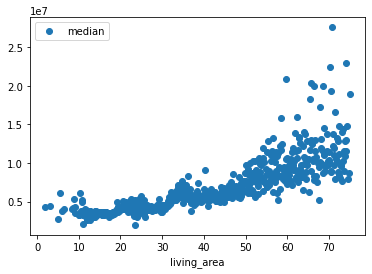

In [46]:
#Изучение зависимость цены от жилой площади квартиры.

pivot_table_total_area_living = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area_living.columns = ['mean', 'count', 'median']
pivot_table_total_area_living.plot(y = 'median', style = 'o')

pivot_table_total_area_living.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

Зависимость цены от жилой площади немного ниже, чем от общей площади и составляет 0.5 коэффициента Пирсона. При этом, как и в случае с общей площадью можно говорить о том, что с увеличением жилой площади наблюдается тенденция к росту цены на квартиру.

0.46841313363445125

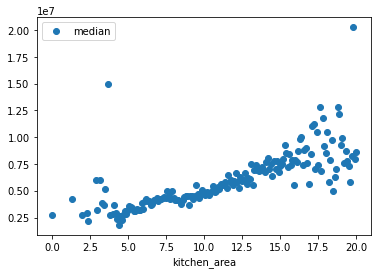

In [47]:
#Изучение зависимость цены от площади кухни квартиры.

pivot_table_total_area_kitchen = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area_kitchen.columns = ['mean', 'count', 'median']
pivot_table_total_area_kitchen.plot(y = 'median', style = 'o')

pivot_table_total_area_kitchen.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

Зависимость цены от площади кухни имеет чуть меньший коэффициент Пирсона, чем зависимость цены от жилой площади, составляет 0,49. При этом, вместе с увеличением площади кухни от 0 до 12,м2 происходит увеличение стоимость квартиры. Интересные случаи наблюдаются при размере кухни 15-20м2 – ценовой диапазон квартир, имеющих данную площадь кухни, не соотносится с тенденцией к росту общей стоимости. Можно предположить, что это происходит из-за того, что с увеличением площади кухни не увеличивается жилая площадь, или же площадь кухни увеличивается в ущерб жилой, из-за чего не происходит увеличения цены.

0.41180962490702966

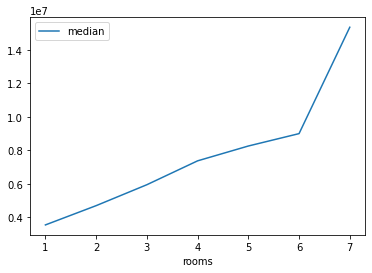

In [48]:
#Изучение зависимость цены от количества комнат.

pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.plot(y = 'median')

pivot_table_rooms.sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

Зависимость цены от количества комнат примерно такое же, как и от площади кухни и составляет 0,42 коэффициента Пирсона. С увеличением числа комнат растет и общая стоимость квартиры. 

,mean,count,median
floor_category,,,
другой,5.492748e+06,16071,4650000
первый,4.259785e+06,2788,3800000
последний,4.867110e+06,3014,4100000


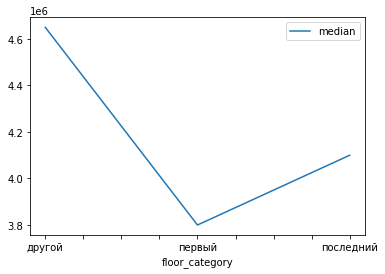

In [49]:
#Изучение зависимость цены от типа этажа.

pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

Зависимость цены от типа этажа заключается в следующем: квартиры на первом этажа имеют самую низкую цену. Можно предположить, что это связано с тем, что жить на первом этаже крайне некомфортно: шум дороги, проходящие мимо люди и далее. При этом, стоимость квартир на других этажах является самой высокой. А квартиры на последнем этаже, хотя и дороже квартир на первом, но не такие дорогие как на других этаж. Можно предположить, что данный факт связан с риском жизни на последних этажа: протечки крыши. 

,mean,count,median
weekday_exposition,,,
0,5.257690e+06,3346,4500000
1,5.276306e+06,3862,4500000
2,5.331025e+06,3664,4500000
3,5.306961e+06,3936,4479650
5,5.133843e+06,1800,4427500
4,5.184504e+06,3692,4400000
6,5.115825e+06,1573,4400000


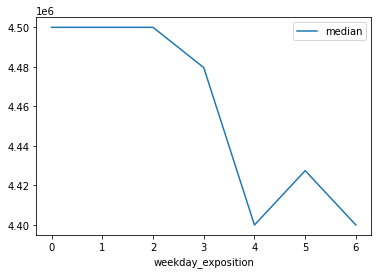

In [50]:
#Изучение зависимость цены от дня размещения.

pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

Зависимость цены от дня публикации существует. В частности, квартиры, опубликованные в пн, вт и ср имею самую высокую цену. При этом объявления, опубликованные в пятницу, имеют цену намного ниже всех остальных объявлений. Объявления с субботы и воскресенья имеют одинаковую стоимость, но остаются ниже тех, что были размещены в пн, вт и ср. Можно предположить, что квартиры, которое публикуют в пятницу, выставляют на продажу люди в желанием, чтобы их квартиры посмотрели за входные и купили, в связи с чем, они ставят цену ниже, чтобы сделать предложение более привлекательным для покупателей.

,mean,count,median
month_exposition,,,
4,5.307346e+06,2201,4600000
3,5.201655e+06,2395,4500000
9,5.351454e+06,1820,4500000
11,5.296701e+06,2180,4500000
12,5.269898e+06,1506,4500000
1,5.285976e+06,1372,4492500
10,5.268358e+06,1986,4490000
8,5.348659e+06,1629,4480000
2,5.197760e+06,2438,4450000


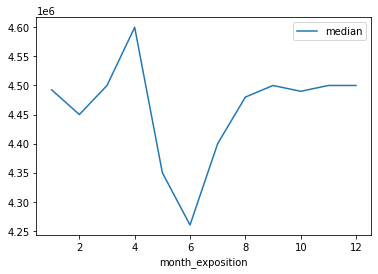

In [51]:
#Изучение зависимость цены от месяца размещения.

pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

Зависимость цены от месяца размещения объявления заключается в том, что самые высокие цены на недвижимость у тех квартир, которые были выставленные на продажу в апреле. В летний период, а точнее в июне, цены самые маленькие, а к октябрю они выходят на тот же уровень, на котором были в первые январе. Объяснить снижение цен в июне можно тем, что в период отпусков не так много людей занимаются покупкой квартиры, в связи с чем, те, кто ее продают хотят сделать это как можно быстрее, в связи с чем, выставляют более низкую цену. Высокие цены на объекты, размещенные в апреле могут быть связаны с тем, что проходит уже 3 месяца с нового года, таким образом, что покупатели уже сконцентрировались на работе и делах, а также прошла пора новогодних трат, в связи с чем продавцы могут завышать стоимость квартир. 

,mean,count,median
month_exposition,,,
4,5.307346e+06,2201,4600000
3,5.201655e+06,2395,4500000
9,5.351454e+06,1820,4500000
11,5.296701e+06,2180,4500000
12,5.269898e+06,1506,4500000
1,5.285976e+06,1372,4492500
10,5.268358e+06,1986,4490000
8,5.348659e+06,1629,4480000
2,5.197760e+06,2438,4450000


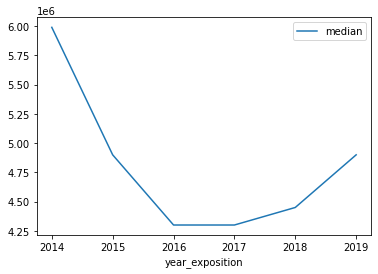

In [52]:
#Изучение зависимость цены от года размещения.

pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

Зависимость цены от годы публикации заключается в том, что в период 2016-2017 годов цена на квартиры была самой низкой. Затем, в 2018 и 2019 году цены выросли, но не достигли показателей 2014- 2015 годов. Можно предположить, что падение цен в 2016-2017 году связано с тем, что в данный период возросли объемы первичного жилья, стоимость стала ниже, а в след за ним был вынужден опуститься и вторичный рынок жилья (чтобы квартиры продолжали покупать). Высокие цены на недвижимость в 2014 году можно связать с тем фактом, что произошло значительное и резкое падение рубля, таким образом, спроса на покупку недвижимости могло стать больше, чем предложения, что и привело к высоким ценам. О том, что после снижения цен началось их увеличение можно сказать, что либо это было связано со снижением количества строящихся домов, или же с ростом уровня благосостояния населения, что привело и к росту цен соответственно. 

### Подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделение населённые пунктов с самой высокой и низкой стоимостью квадратного метра.

In [53]:
top_10 = data['locality_name'].value_counts().index.tolist()[:10]
mean_10_metrics = [data[data['locality_name'] == city]['price_per_square_meter'].median().round(2) for city in top_10]
mean_10_prices = [data[data['locality_name'] == city]['last_price'].median() for city in top_10]
frame = {'Город': top_10, 'Средняя цена за кв.м.': mean_10_metrics, 'Средняя цена за квартиру.': mean_10_prices}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м.', ascending=False)
dataframe

,Город,Средняя цена за кв.м.,Средняя цена за квартиру.
0,Санкт-Петербург,103448.0,5249000.0
5,Пушкин,98471.0,4990000.0
2,Кудрово,95840.0,3800000.0
7,Парголово,91779.5,4100000.0
1,Мурино,86332.0,3400000.0
3,Шушары,76829.0,3950000.0
6,Колпино,74723.5,3600000.0
8,Гатчина,67695.0,3050000.0
4,Всеволожск,65648.0,3450000.0
9,Выборг,58108.0,2800000.0


In [54]:
data.loc[data.locality_name.isin(top_10)].groupby('locality_name').agg(
    mean_10_metrics=('price_per_square_meter', 'mean'),
    mean_10_prices=('last_price', 'mean')
).sort_values('mean_10_metrics', ascending=False).round(2)

,mean_10_metrics,mean_10_prices
locality_name,,
Санкт-Петербург,109806.62,6264696.81
Пушкин,101447.78,5568358.94
Кудрово,95599.31,4293010.49
Парголово,90297.88,4466322.40
Мурино,86114.94,3655082.67
Шушары,78554.30,4059621.24
Колпино,75387.04,3823220.62
Гатчина,68621.15,3424220.47
Всеволожск,68449.19,3715401.25


Как можно увидеть, самые дорогие квартиры (как за все жилье, так и за 1 кв.м.) в Санкт-Петербурге и парковом городе Пушкине. Можно предположить, что Пушкин занимает второе место по стоимости жилья именно из-за того, что имеет большую парковую зону, которая может быть крайне привлекательна для определенных категорий покупателей. Также становится очевидно, что чем дальше от города, тем дешевле. Так, в Выборге средняя цена за квадратный метр в 2 раз ниже, чем в Санкт-Петербурге.

**Изучение квартир в Санкт-Петербурге и вычисление средней цены каждого километра. Описание того, как стоимость объектов зависит от расстояния до центра города.**

,price_per_square_meter
cityCenters_km,
0.0,169470.666667
1.0,150428.443548
2.0,138928.509804
3.0,117979.421687
4.0,125478.917160
5.0,133060.685590
6.0,132659.258947
7.0,132664.341317
8.0,120991.317460


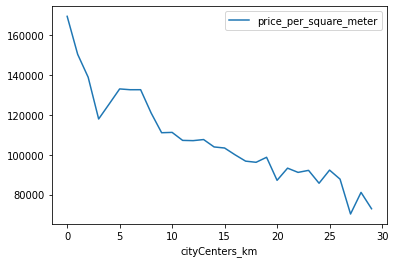

In [55]:
pivot_table_km_price = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km_price.plot()
pivot_table_km_price

Рассматривая зависимость цены на квартиру от ее удаленности от центра Санкт-Петербурга, становится видно, что квартиры в самом центре не являются самыми дорогими. При этом, расстояние 1-2 и 4-7 км от центра оказывает значительное влияние на стоимость недвижимости: она является самой дорогой. Преодолевая радиус 7км удаленности от центра цена на квартиру начинает постепенно снижаться вместе с последующим удалением от центра города. Говоря о том, почему цена при расстоянии 4-7 км от центра схожа с ценой тех объектов недвижимости, которые находятся на расстоянии 1-2км, может заключатся в специфике районов города. Так, Василеостровский и Петроградский районы не считаются центральными, но при этом они считаются престижными для жизни, и находятся не далеко от центра. Таким образом, цена на квартиры в данных районах может быть столь же высокой, что и прямо в центре, что объясняет распределение цен в радиусе 4-7 км от центра. 

## Общий вывод

В рамках проведения исследования были обнаружены следующие особенности рассматриваемого рынка недвижимости: 
 - Во-первых, самая высокая стоимость у тех объектов недвижимости, которые находятся непосредственно Санкт-Петербурге. При этом их удаленность от центра города не обязательно означает снижение их цены, что, скорее всего связанно с районами города. Традиционно, стоимость жилья на Крестовском районе намного выше, чем во многих других районах города из-за его престижности, но при этом он удалён от центра (схожие выводы можно сказать и про Василеостровский и Петроградские районы).
 - Во-вторых, цена квартиры напрямую зависит от ее общей площади и числа комнат: цена увеличивается вместе с увеличением общей площади и количества комнат в квартире. Также важную роль играет этаж квартиры: квартиры на первом этаже самые дешевые. 
 - В-третьих, говоря о том, в какие годы квартиры стоили больше всего, то стало оеивдно6 что это 2014-2015 годы. 
 - В-четвертых, летние месяцы были наиболее удачными для покупателей, так как в них цена на квартире была намного ниже, чем зимой или осенью.
 - Наконец, говоря о продолжительно периоды продажи квартиры, то, в среднем, 3 месяца являются тем сроков, за которой в Санкт-Петербурге и Ленинградской области продавались квартиры. 